In [1]:
# import pywikibot
# import wikipedia
import wikipediaapi

site = pywikibot.Site("en", "wikipedia")  # The site we want to run our bot on
page = pywikibot.Page(site, "January 1")

page.full_url()

page.pageid

In [2]:
# def pull_page(page_name):
#     site = pywikibot.Site("en", "wikipedia")  # The site we want to run our bot on
#     page = pywikibot.Page(site, page_name)
#     page_id = page.pageid
#     page = wikipedia.page(pageid=page_id)
#     return page

In [3]:
numbers = range(1, 31)
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

In [4]:
wiki_wiki = wikipediaapi.Wikipedia(
    user_agent="Star_sign_prediction (jbm112358@gmail.com)", language="en"
)

page_py = wiki_wiki.page("January_1")

In [14]:
all_df = pd.DataFrame()
for month in months:
    print(month)
    for day in numbers:
        try:
            page = wiki_wiki.page(f"{month}_{day}")
            temp_df = pd.DataFrame(
                [
                    [y.strip() for y in x.split(" – ")]
                    for x in str(page.section_by_title("Births")).split("\n")
                ],
                columns=["Year", "Name"],
            )
            temp_df["date"] = f"{month} {day}"
            all_df = pd.concat([all_df, temp_df])
        except Exception as e:
            print(f"problem with {month}_{day}: {e}")
    #     break
    # break

January
problem with January_17: 2 columns passed, passed data had 5 columns
problem with January_23: 2 columns passed, passed data had 3 columns
February
problem with February_30: 2 columns passed, passed data had 1 columns
March
April
May
June
July
August
September
problem with September_6: 2 columns passed, passed data had 3 columns
October
November
December


In [13]:
all_df.head()

,Year,Name,date
0,Section: Births (1):,None,January 1
1,,None,January 1
2,Subsections (3):,None,January 1
3,Section: Pre-1600 (2):,None,January 1
4,766,"Ali al-Ridha, 8th Imam of Twelver Shia Islam (...",January 1


In [15]:
all_df.to_csv("famous_births.csv")

In [16]:
all_df["Year"] = pd.to_numeric(all_df["Year"], errors="coerce")

<Axes: ylabel='Frequency'>

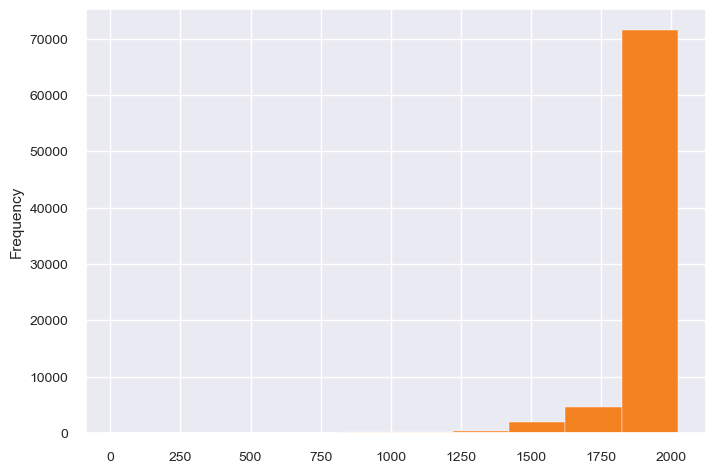

In [17]:
all_df["Year"].plot.hist()

In [18]:
print(len(all_df))

83251


In [19]:
all_df["count"] = 1
all_df.groupby("date").count().sort_values("count", ascending=False).head()

,Year,Name,count
date,,,
April 5,552,552,564
November 20,509,509,521
October 25,442,442,454
January 21,439,439,451
March 4,432,432,444
